In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")

In [3]:
dataset.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [4]:
dataset.shape

(53392, 33)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [6]:
dataset.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [7]:
dataset = dataset[['Question','Data_Value','Low_Confidence_Limit','High_Confidence_Limit ']]

In [8]:
dataset.shape

(53392, 4)

In [9]:
dataset.columns

Index(['Question', 'Data_Value', 'Low_Confidence_Limit',
       'High_Confidence_Limit '],
      dtype='object')

In [10]:
dataset.isnull().sum()

Question                     0
Data_Value                5046
Low_Confidence_Limit      5046
High_Confidence_Limit     5046
dtype: int64

In [11]:
dataset.head()

,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
0,Percent of adults aged 18 years and older who ...,32.0,30.5,33.5
1,Percent of adults aged 18 years and older who ...,32.3,29.9,34.7
2,Percent of adults aged 18 years and older who ...,31.8,30.0,33.6
3,Percent of adults aged 18 years and older who ...,33.6,29.9,37.6
4,Percent of adults aged 18 years and older who ...,32.8,30.2,35.6


In [12]:
dataset['Question'].unique()

array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who report consuming fruit less than one time daily',
       'Percent of adults who report consuming vegetables less than one time daily',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity 

In [13]:
#here we are interested in the survey question directly about obesity and overweight percent

X=['Percent of adults aged 18 years and older who have obesity','Percent of adults aged 18 years and older who have an overweight classification']

In [14]:
dataset = dataset[dataset['Question']==X[0]]

In [15]:
dataset.head()

,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
0,Percent of adults aged 18 years and older who ...,32.0,30.5,33.5
1,Percent of adults aged 18 years and older who ...,32.3,29.9,34.7
2,Percent of adults aged 18 years and older who ...,31.8,30.0,33.6
3,Percent of adults aged 18 years and older who ...,33.6,29.9,37.6
4,Percent of adults aged 18 years and older who ...,32.8,30.2,35.6


In [16]:
#One Hot Encoding
dataset = pd.get_dummies(dataset, columns=['Question'], drop_first=True)
dataset.head()

,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
0,32.0,30.5,33.5
1,32.3,29.9,34.7
2,31.8,30.0,33.6
3,33.6,29.9,37.6
4,32.8,30.2,35.6


In [17]:
dataset.shape

(8960, 3)

In [18]:
dataset.corr()

,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
Data_Value,1.000000,0.917671,0.892191
Low_Confidence_Limit,0.917671,1.000000,0.642873
High_Confidence_Limit,0.892191,0.642873,1.000000


<AxesSubplot:>

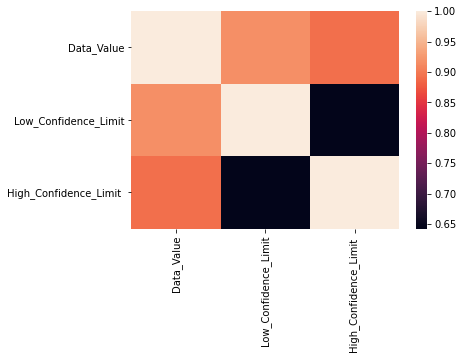

In [19]:
sns.heatmap(dataset.corr())

In [20]:
dataset.shape

(8960, 3)

In [21]:
dataset.dropna(axis=0,inplace=True)

In [22]:
dataset.isna().sum()

Data_Value                0
Low_Confidence_Limit      0
High_Confidence_Limit     0
dtype: int64

In [23]:
dataset.dtypes

Data_Value                float64
Low_Confidence_Limit      float64
High_Confidence_Limit     float64
dtype: object

In [24]:
dataset.columns

Index(['Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit '], dtype='object')

In [25]:
dataset['Data_Value'] = dataset['Data_Value'].astype(int)
dataset['Low_Confidence_Limit'] = dataset['Low_Confidence_Limit'].astype(int)
dataset['High_Confidence_Limit '] = dataset['High_Confidence_Limit '].astype(int)

In [26]:
dataset.dtypes

Data_Value                int32
Low_Confidence_Limit      int32
High_Confidence_Limit     int32
dtype: object

In [27]:
dataset.head()

,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
0,32,30,33
1,32,29,34
2,31,30,33
3,33,29,37
4,32,30,35


In [28]:
X = dataset.iloc[:, [1,2]].values
y = dataset.iloc[:, 0].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)


In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)



LogisticRegression()

In [31]:
lr.score(X_train, y_train)

0.08810500410172273

In [32]:
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

0.08366141732283465